# Лабораторная работа №1

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.lines import Line2D
%matplotlib inline

In [263]:
sns.set_theme()

## 1.	Загрузите данные в ноутбук

In [264]:
df: pd.DataFrame = pd.read_excel('data/Вариант 3.xlsx', header=2, skipfooter=1)  # noqa
df.head()

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1,152,11,М,333,----001---00---000--1-+0---,0(3)0(3)0(3)0(3)0(3),NaN,3,10,36
1,2,140,12,Ж,332,----100---01-+-000--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,4,14,36
2,3,137,11,М,328,--+-010---00---101--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36
3,4,148,11,М,333,-+--000--+01---100--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36
4,5,153,11,Ж,333,-+--100---00---100-+0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36


## 2.	Сделайте описательную статистику по среднему баллу

In [265]:
df['Балл'].describe()

count    1180.000000
mean       52.047458
std        14.965477
min        10.000000
25%        41.000000
50%        49.000000
75%        60.250000
max       100.000000
Name: Балл, dtype: float64

## 3.	Найдите процент учащихся, выполнивших работу ниже среднего

In [266]:
print(f"Процент учащихся, набравших меньше среднего = {(df['Балл'] < df['Балл'].mean()).sum() / len(df):.2%}")  # noqa

Процент учащихся, набравших меньше среднего = 56.27%


## 4.	Найти процент учащихся не сдавших экзамен

In [267]:
print(f"Процент учащихся, набравших меньше среднего = {(df['Балл'] < df['Минимальный балл']).sum() / len(df):.2%}")  # noqa

Процент учащихся, набравших меньше среднего = 7.71%


## 5.	Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

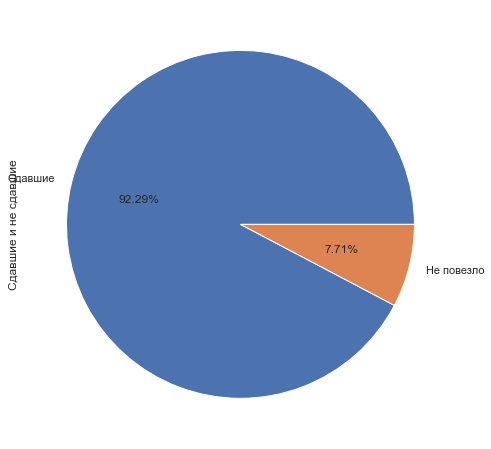

In [268]:
s: pd.Series = (df['Балл'] >= df['Минимальный балл']).value_counts().rename('Сдавшие и не сдавшие')  # noqa
s.index = s.index.map({False: 'Не повезло', True: 'Сдавшие'})
_ = s.plot.pie(figsize=(8, 8), autopct='%1.2f%%')

## 6.	Постройте гистограмму по распределению баллов за экзамен. Соответствует ли оно нормальному распределению?

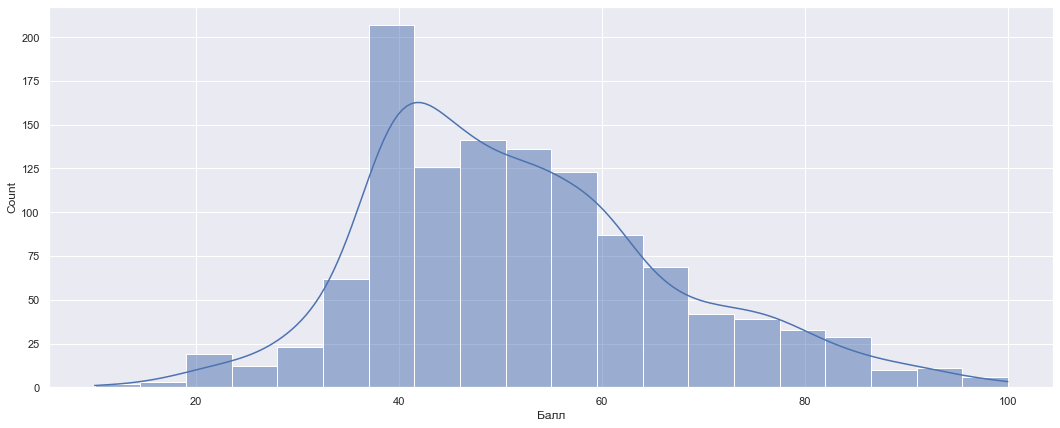

In [269]:
# распределение близкое к нормальному
_, ax = plt.subplots(figsize=(18, 7))
_ = sns.histplot(x=df['Балл'], bins=20, kde=True, ax=ax)

## 7.	Постройте ядерной оценку плотности распределению баллов за экзамен

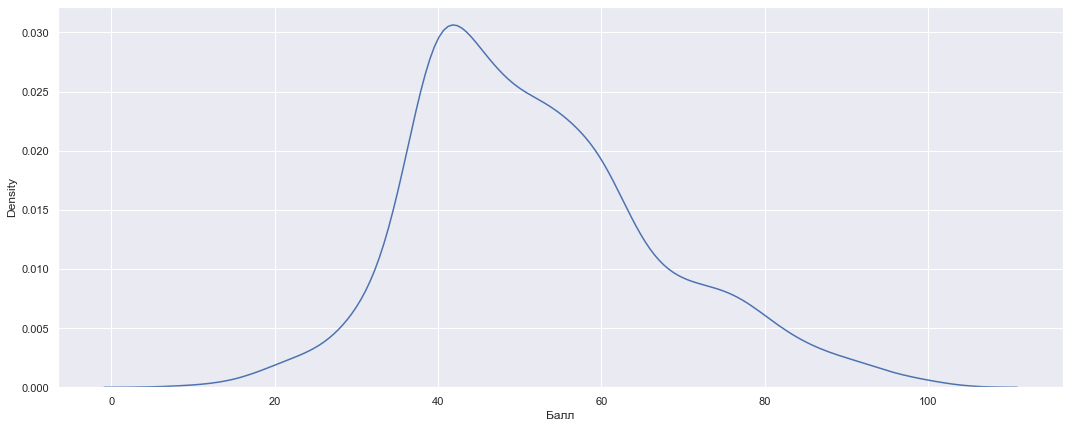

In [270]:
_, ax = plt.subplots(figsize=(18, 7))
_ = sns.kdeplot(x=df['Балл'], ax=ax)

## 8.	Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно». Сделайте графическое представление данного распределения

In [271]:
def exam_scale_mask(s: pd.Series, left: int = 0, right: int = 100):
    return (s >= left) & (s <= right)


def exam_scale(s: pd.Series, left: int = 0, right: int = 100) -> float:
    return exam_scale_mask(s, left, right).sum() / len(s) * 100

In [272]:
score = df['Балл']
s = pd.Series({
    'неудовлетворительно': exam_scale(score, right=35),
    'удовлетворительно': exam_scale(score, left=36, right=52),
    'хорошо': exam_scale(score, left=53, right=67),
    'отлично': exam_scale(score, left=68),
}, name='ЕГЭ в оценках')
s

неудовлетворительно     7.711864
удовлетворительно      48.559322
хорошо                 27.796610
отлично                15.932203
Name: ЕГЭ в оценках, dtype: float64

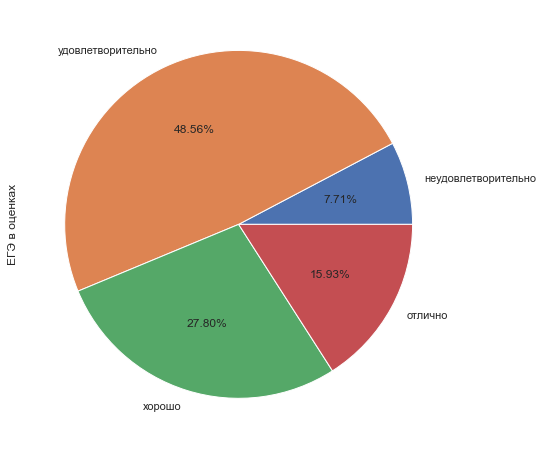

In [273]:
_ = s.plot.pie(figsize=(8, 8), autopct='%1.2f%%')

## 9.	Постройте «ящиковые диаграммы», сравнивающие баллы учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно»

In [274]:
score = df['Балл']
exam_scale_sample = pd.DataFrame({
    'неудовлетворительно': score[exam_scale_mask(score, right=35)],
    'удовлетворительно': score[exam_scale_mask(score, left=36, right=52)],
    'хорошо': score[exam_scale_mask(score, left=53, right=67)],
    'отлично': score[exam_scale_mask(score, left=68)],
})
exam_scale_sample.head()

,неудовлетворительно,удовлетворительно,хорошо,отлично
0,10.0,NaN,NaN,NaN
1,14.0,NaN,NaN,NaN
2,17.0,NaN,NaN,NaN
3,17.0,NaN,NaN,NaN
4,17.0,NaN,NaN,NaN


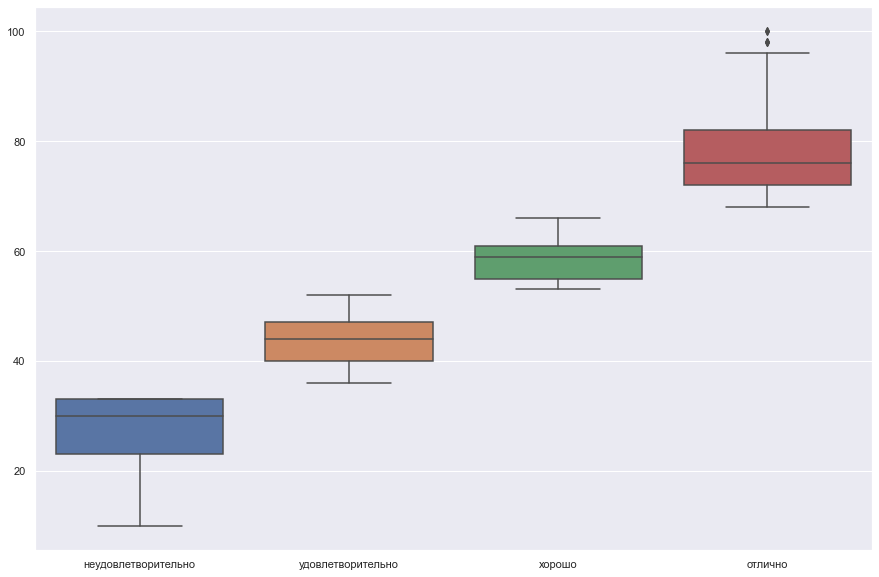

In [275]:
_, ax = plt.subplots(figsize=(15, 10))
_ = sns.boxplot(data=exam_scale_sample, ax=ax)

## 10.	Какое процентное соотношение юношей и девушек писало данный экзамен? Представьте графически

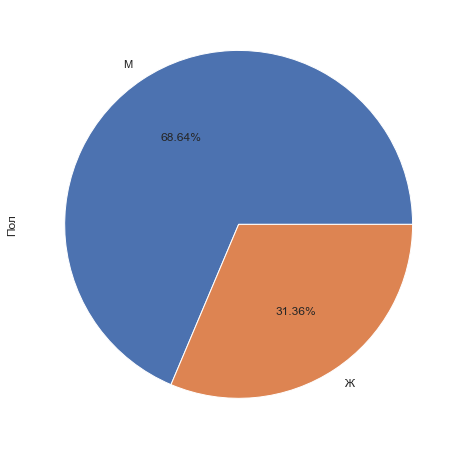

In [276]:
_ = df['Пол'].value_counts().plot.pie(figsize=(8, 8), autopct='%1.2f%%')

## 11.	Постройте диаграмму рассеивания, позволяющую увидеть средние баллы девушек и юношей

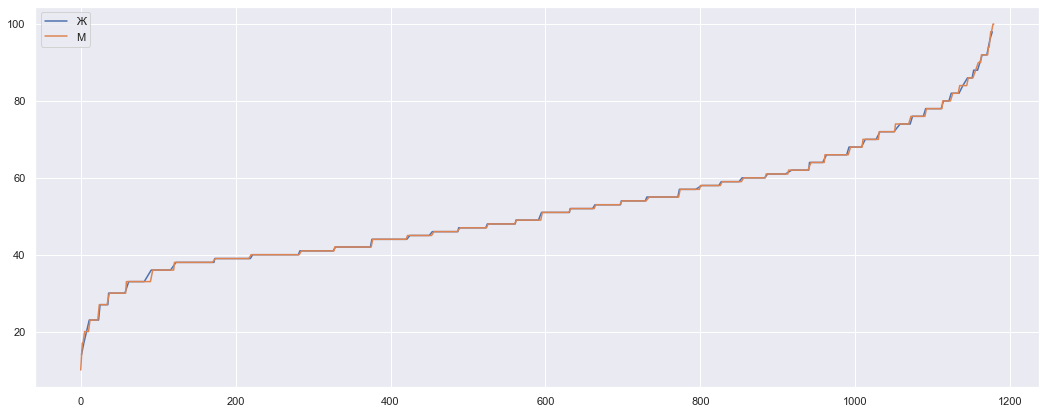

In [277]:
_ = df.groupby('Пол')['Балл'].plot(figsize=(18, 7), legend=True)

## 12.	Сколько школ (код ППЕ) принимало участие в экзамене?

In [278]:
print(f'В экзамене принимало участие {df["№ школы"].nunique()} школ')

В экзамене принимало участие 19 школ


## 13.	Постройте диаграмму, позволяющую сравнить средние баллы за экзамен по школам. Если какие-нибудь выбросы?

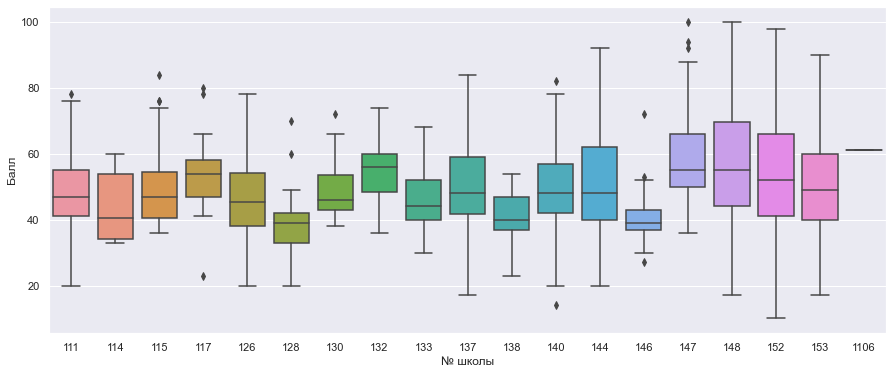

In [279]:
# Да, выбросы имеются, например в 146 школе сильно выделяется ученик, набравший 72 балла. В других школах также имеются выбросы
_, ax = plt.subplots(figsize=(15, 6))
_ = sns.boxplot(data=df, x='№ школы', y='Балл', ax=ax)

# __Повышенной сложности:__

## 1.	Сколько всего заданий с кратким ответом? С развернутым ответом?

In [280]:
first_row = df.head(1)
pattern = re.compile(r'\d+\(\d+\)')

print(f'Заданий с кратким ответом: {first_row["Задания с кратким ответом"].str.len().item()}')
print(f'Заданий с развернутым ответом: {first_row["Задания с развёрнутым ответом"].str.count(pattern).item()}')

Заданий с кратким ответом: 27
Заданий с развернутым ответом: 5


## 2.	Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В1 … Вк  Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. Постройте гистограмму, позволяю щую увидеть данное распределение. Какие есть выпады по данному распределению?

In [285]:
short_answers = df["Задания с кратким ответом"].str.replace('0', '-').str.split('', expand=True)
short_answers: pd.DataFrame = short_answers.drop(columns=[0, len(short_answers.columns) - 1])
short_answers.head()

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
0,-,-,-,-,-,-,1,-,-,-,...,-,-,-,1,-,+,-,-,-,-
1,-,-,-,-,1,-,-,-,-,-,...,-,-,-,-,-,-,1,-,-,-
2,-,-,+,-,-,1,-,-,-,-,...,1,-,-,-,-,-,1,-,-,-
3,-,+,-,-,-,-,-,-,-,+,...,-,-,-,-,-,-,1,-,-,-
4,-,+,-,-,1,-,-,-,-,-,...,-,-,+,-,-,-,1,-,-,-


In [286]:
short_answers[short_answers != '-'] = 'Сдал'
short_answers[short_answers == '-'] = 'Не сдал'
short_answers.columns = map(lambda x: f'B{x}', short_answers.columns)
short_answers = short_answers.melt()
short_answers.head()

,variable,value
0,B1,Не сдал
1,B1,Не сдал
2,B1,Не сдал
3,B1,Не сдал
4,B1,Не сдал


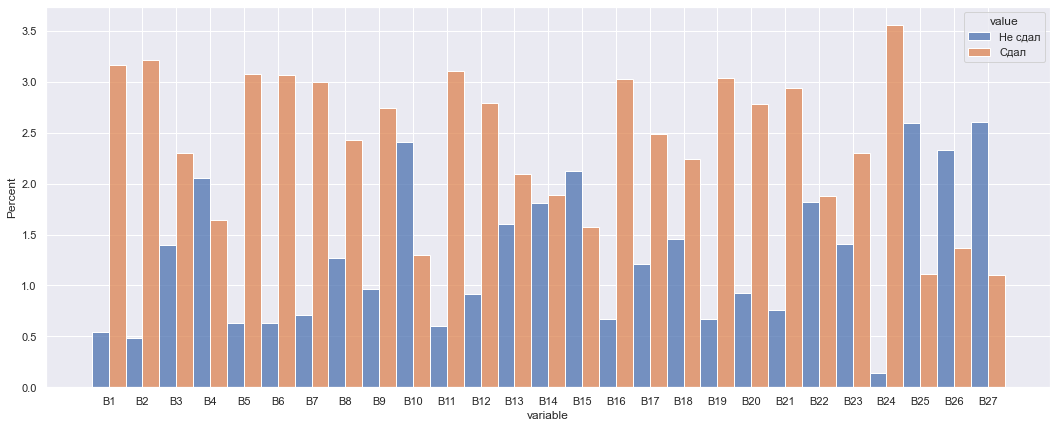

In [287]:
# из явных выпадов видно, что с заданием B24 справилось подавляющее большинство сдававших
_, ax = plt.subplots(figsize=(18, 7))
_ = sns.histplot(data=short_answers, stat='percent', x='variable', hue='value', multiple='dodge', ax=ax)

## 3.	Аналогично и с типом С (ответы с развернутым ответом)

Явных выпадов не видно, но можно заметить, что с C2 справляется больше людей, чем с остальными задачами

## 4.	Сделайте анализ по двум школам:
* А) по всем выполненным заданиям типа В
* Б) по заданиям типа С больше 50%
* В) по среднему балу юношей и девушек


In [284]:
first_school, second_school = 140, 153

### Б) по заданиям типа С больше 50%

В школе №140 никто не решил С4 более, чем на 50%

### в) по среднему балу юношей и девушек